# Econometrics - Statsmodels

- Regression analysis on python is based on two libraries : statsmodels, linearmodels
    - (1) statsmodels : [statsmodels](https://www.statsmodels.org/stable/index.html)
        - Cross-sectional models, time-series models
    - (2) Linearmodels : [linearmodels](https://pypi.org/project/linearmodels/)
        - Panel, Instrumental Variable, Asset Pricing, and System Regression models

<img src="./img/1.png" width="1200" height="600">

##### Research Problem : 
- Asset pricing models only care about systematic risk and claim that risk premia is the only determinant of asset returns. 
- Conversely, in other words they have nothing to say about individual returns.
- Let's assume that we want to explain individual returns.
- People say that asset prices increase when someone buys the asset, and vice versa.
    - Are asset returns related with demand pressure? 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('data/005930.txt', index_col=0, parse_dates=True)
cols = df.columns
df['date'] = df.index.date
print(df.head())
df = df.loc[(df.date == df.date.shift()) | (df.date ==df.date.shift(-1)), ][cols] #date열을 삭제해준 듯?하다
print(df.head())


                      open   high    low  close  volume     sell      buy  \
date                                                                        
2017-04-24 09:02:00  41200  41200  41180  41200   41700  12700.0  29000.0   
2017-04-24 09:03:00  41200  41220  41180  41200   21750   5250.0  16500.0   
2017-04-24 09:04:00  41200  41220  41200  41200   25450   6900.0  18550.0   
2017-04-24 09:05:00  41200  41200  41140  41140   15350   7850.0   7500.0   
2017-04-24 09:06:00  41140  41180  41140  41160   16450   6100.0  10350.0   

                           kospi        date  
date                                          
2017-04-24 09:02:00  2176.090088  2017-04-24  
2017-04-24 09:03:00  2176.260010  2017-04-24  
2017-04-24 09:04:00  2176.260010  2017-04-24  
2017-04-24 09:05:00  2175.459961  2017-04-24  
2017-04-24 09:06:00  2174.350098  2017-04-24  
                      open   high    low  close  volume     sell      buy  \
date                                                  

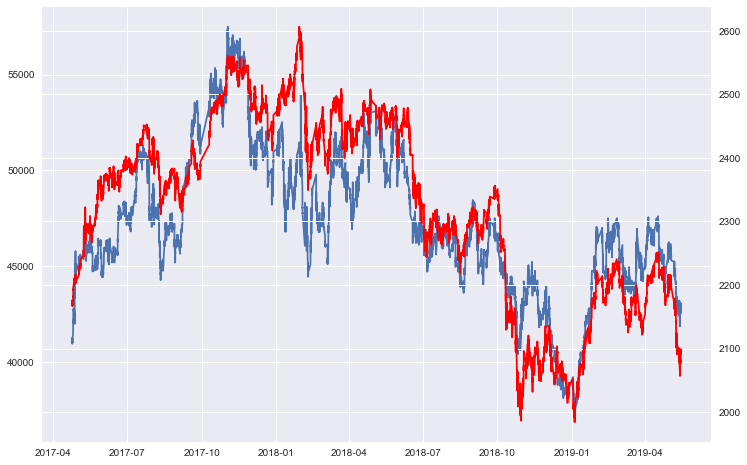

In [2]:
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax1.plot(df.close) #삼전종가
ax2.plot(df.kospi, 'r') #kospi종가
plt.show() #삼전과 kospi는 비슷하다

In [3]:
# resample to 20m : 너무 좁게하면 통계적인 문제가 생김.

df_20 = pd.DataFrame()
df_20['open'] = df.open.resample('20t').first()
df_20['high'] = df.open.resample('20t').max()
df_20['low'] = df.open.resample('20t').min()
df_20['close'] = df.open.resample('20t').last()

df_20 # 아래 셀 코드를 참조할 것

,open,high,low,close
date,,,,
2017-04-24 09:00:00,41200.0,41200.0,41040.0,41100.0
2017-04-24 09:20:00,41100.0,41100.0,41020.0,41040.0
2017-04-24 09:40:00,41060.0,41240.0,41040.0,41240.0
2017-04-24 10:00:00,41240.0,41240.0,41180.0,41180.0
2017-04-24 10:20:00,41180.0,41180.0,41080.0,41080.0
2017-04-24 10:40:00,41100.0,41120.0,41040.0,41060.0
2017-04-24 11:00:00,41020.0,41060.0,40980.0,40980.0
2017-04-24 11:20:00,41000.0,41060.0,40920.0,41000.0
2017-04-24 11:40:00,41000.0,41080.0,41000.0,41060.0


In [15]:
def mindata(df,h) : 
    
    temp = pd.DataFrame()
    temp['open'] = df.open.resample(h).first().dropna()
    temp['high'] = df.high.resample(h).max()
    temp['low'] = df.low.resample(h).min()
    temp['close'] = df.close.resample(h).last()
    temp['volume'] = df.volume.resample(h).sum()
    temp['buy'] = df.buy.resample(h).sum()
    temp['sell'] = df.sell.resample(h).sum()
    temp['kospi'] = df.kospi.resample(h).last()
    
    return temp

df_20 = mindata(df,'20t') #참고로 바로 위 셀코드와 같은 내용임
# df(원래 data)를 20분단위로 resample하고 폐장시간을 drop하고 위 함수와 같이 정보들을 새롭게 해서 df_20에 넣어줌
df_20.head() #20분단위로 분석해서 필요한 정보들을 넣고 다시 하루로 나중에 합칠 것임

,open,high,low,close,volume,buy,sell,kospi
date,,,,,,,,
2017-04-24 09:00:00,41200.0,41220.0,41020.0,41080.0,399100,222300.0,176800.0,2174.939941
2017-04-24 09:20:00,41100.0,41100.0,41020.0,41060.0,370150,150050.0,220100.0,2172.189941
2017-04-24 09:40:00,41060.0,41260.0,41040.0,41220.0,566700,431150.0,135550.0,2174.409912
2017-04-24 10:00:00,41240.0,41240.0,41160.0,41160.0,501700,225550.0,276150.0,2172.889893
2017-04-24 10:20:00,41180.0,41180.0,41060.0,41080.0,242950,123050.0,119900.0,2169.459961


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


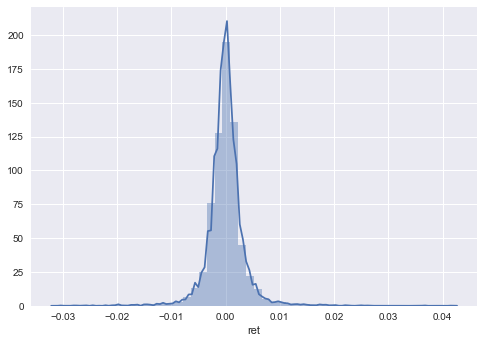

In [5]:
# compute returns, 20분 단위 수익률과 분포를 구하고 그린것임. 
# 그림을 그려본 이유는 skew한지 확인해보기 위해서임 치우쳐저있으면 대표성이 없다고 판단함. 그리므로 symmetric해야함. 

df_20['ret'] = df_20.close.pct_change()
sns.distplot(df_20.dropna().ret)

In [6]:
#모형을 사용하는데 문제없는지 확인하는 작업이다.(특히 자기상관)

print(df_20.ret.mean())
print(df_20.ret.std())
print(df_20.ret.skew())
print(df_20.ret.kurtosis())
print(df_20.ret.autocorr()) #자기상관이 중요한데 거의 0이라봐도 무방하므로 ok이다

9.97348505534206e-06
0.003588090737379132
0.21745939141146095
16.37912382375123
-0.037096347114591574


In [7]:
# What independent variables should we use? (독립변수 x들)

# (1) Kospi return 

df_20['kospi_ret'] = df_20.kospi.pct_change()

# (2) Order flow(주문흐름)

df_20['of'] = df_20.buy - df_20.sell

# (3) Volatility(변동성)

df_20['volatility']  = df_20['ret']**2

In [8]:
df_20

,open,high,low,close,volume,buy,sell,kospi,ret,kospi_ret,of,volatility
date,,,,,,,,,,,,
2017-04-24 09:00:00,41200.0,41220.0,41020.0,41080.0,399100,222300.0,176800.0,2174.939941,NaN,NaN,45500.0,NaN
2017-04-24 09:20:00,41100.0,41100.0,41020.0,41060.0,370150,150050.0,220100.0,2172.189941,-0.000487,-0.001264,-70050.0,2.370277e-07
2017-04-24 09:40:00,41060.0,41260.0,41040.0,41220.0,566700,431150.0,135550.0,2174.409912,0.003897,0.001022,295600.0,1.518456e-05
2017-04-24 10:00:00,41240.0,41240.0,41160.0,41160.0,501700,225550.0,276150.0,2172.889893,-0.001456,-0.000699,-50600.0,2.118783e-06
2017-04-24 10:20:00,41180.0,41180.0,41060.0,41080.0,242950,123050.0,119900.0,2169.459961,-0.001944,-0.001579,3150.0,3.777715e-06
2017-04-24 10:40:00,41100.0,41120.0,41020.0,41020.0,272850,146100.0,126750.0,2167.229980,-0.001461,-0.001028,19350.0,2.133249e-06
2017-04-24 11:00:00,41020.0,41080.0,40980.0,40980.0,275900,141450.0,134450.0,2168.830078,-0.000975,0.000738,7000.0,9.508865e-07
2017-04-24 11:20:00,41000.0,41080.0,40920.0,41000.0,282100,154150.0,127950.0,2169.800049,0.000488,0.000447,26200.0,2.381859e-07
2017-04-24 11:40:00,41000.0,41100.0,40980.0,41060.0,196800,121200.0,75600.0,2170.620117,0.001463,0.000378,45600.0,2.141582e-06


In [9]:
#다시 20분 리샘플한 data를 하루단위로 리샘플함.
# Additional issue - overnight returns #주식장 닫혔을때 수익률을 제거해주는 작업
#overnight return 전날종가에서 익일시가 수익률

df_20['date'] = df_20.index.date
df_20['overnight'] = 0
df_20.loc[df_20.date!=df_20.date.shift(), 'overnight'] = df_20.loc[df_20.date!=df_20.date.shift(), 'ret']
# 윗줄 : 전날날짜와 다음날날짜가 변하는 때의 수익률을 overnight에 둔것
# 수능날같은 특정날짜는 10시 개장이므로 매일 9시를 기준으로 코드를 짜지 않고 
# 날짜가 바뀌는 것을 기준으로 코드를 짠 것임
df_20.overnight[df_20.overnight!=0] 
#overnight가 0이 아닌때(즉 날짜가 바뀌는 때 = 개장 떄)에 overnight return이 표시되어있음

date
2017-04-24 09:00:00         NaN
2017-04-25 09:00:00    0.014549
2017-04-26 09:00:00    0.000468
2017-04-27 09:00:00    0.002804
2017-04-28 09:00:00    0.030109
2017-05-02 09:00:00    0.018826
2017-05-04 09:00:00    0.006682
2017-05-08 09:00:00    0.005272
2017-05-10 09:00:00    0.001701
2017-05-11 09:00:00   -0.005702
2017-05-12 09:00:00    0.009670
2017-05-15 09:00:00    0.000436
2017-05-16 09:00:00    0.009544
2017-05-17 09:00:00    0.001294
2017-05-18 09:00:00   -0.009495
2017-05-19 09:00:00   -0.009142
2017-05-22 09:00:00    0.010286
2017-05-23 09:00:00    0.003104
2017-05-24 09:00:00    0.000445
2017-05-25 09:00:00    0.000446
2017-05-26 09:00:00    0.005254
2017-05-29 09:00:00    0.003906
2017-05-30 09:00:00   -0.008330
2017-05-31 09:00:00    0.001344
2017-06-01 09:00:00    0.002685
2017-06-02 09:00:00    0.013876
2017-06-05 09:00:00   -0.000435
2017-06-07 09:00:00    0.005224
2017-06-08 09:00:00    0.003974
2017-06-09 09:00:00    0.014172
                         ...   
201

$Y = X\beta + \epsilon$

In [10]:
# set X and y
test1 = df_20.dropna()

y = (test1.ret - test1.overnight) * 100  #overnight return은 보지 않겠다는 것임.
X = np.log(test1[['volatility', 'volume']]+1) #0일 수도 있으므로 log안네 0을 집어넣으면 에러가 나서 1을 더해준것임
X['of'] = test1.of
X['kospi_ret'] = test1.kospi_ret * 100
X = sm.add_constant(X)  #X의 matrix에 1열에 1을 넣어 상수항까지 보겠다는 것임
X.corr() #multicorlinearity (변수간의 corr이 높으면 문제가 된다.) 따라서 변수간의 corr를 보는 matrix를 만든 것

,const,volatility,volume,of,kospi_ret
const,NaN,NaN,NaN,NaN,NaN
volatility,NaN,1.000000,0.323538,0.035923,-0.038217
volume,NaN,0.323538,1.000000,0.355214,-0.002918
of,NaN,0.035923,0.355214,1.000000,0.126601
kospi_ret,NaN,-0.038217,-0.002918,0.126601,1.000000


- $ y_i = \beta_0 + \beta_1 X_i + \epsilon_i$ 
- $ y_i = \beta_0 + \beta_1 \log{X_i} + \epsilon_i$ 

In [11]:
ols = sm.OLS(y,X)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     865.0
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        03:09:09   Log-Likelihood:                 989.01
No. Observations:                9933   AIC:                            -1968.
Df Residuals:                    9928   BIC:                            -1932.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4739      0.052      9.062      0.000       0.371       0.576
volatility   457.3620     42.305     10.811      0.000     374.435     540.289
volume        -0.0373      0.004     -9.234      0.000      -0.045      -0.029
of          8.508e-08    4.7e-09     18.110      0.000    7.59e-08    9.43e-08
kospi_ret      0.6664      0.013     52.591      0.000       0.642       0.691
==============================================================================
Omnibus:                     1771.534   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43436.192
Skew:                           0.087   Prob(JB):                         0.00
Kurtosis:                      13.243   Cond. No.                     9.84e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.84e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

-3.5562173489891356e-09
0.219049743008347
0.08746648968302563
10.24878103618851
-0.02891407187720628


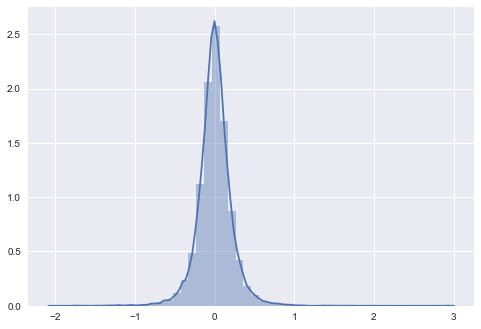

In [12]:
sns.distplot(res.resid)
print(res.resid.mean())
print(res.resid.std())
print(res.resid.skew())
print(res.resid.kurtosis())
print(res.resid.autocorr())

In [13]:
#위와 같은 과정이지만 formula를 사용하는 방법임.(사실 위의 방법으로 다하면되고 이건 거의 안쓴다)

import statsmodels.formula.api as smf
test2 = test1.copy()
test2['y'] = test2.ret - test1.overnight
mod = smf.ols(formula='y ~ kospi_ret + volatility + volume', data=test2).fit() #volume뒤에 +0이나 -1을 붙이면 상수항빼고 분석하는 것임
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     1008.
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        03:09:09   Log-Likelihood:                 46567.
No. Observations:                9933   AIC:                        -9.313e+04
Df Residuals:                    9929   BIC:                        -9.310e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.353e-05   3.13e-05     -0.751      0.453    -8.5e-05    3.79e-05
kospi_ret      0.6968      0.013     54.580      0.000       0.672       0.722
volatility     3.6901      0.436      8.472      0.000       2.836       4.544
volume      -4.03e-11   4.24e-11     -0.952      0.341   -1.23e-10    4.27e-11
==============================================================================
Omnibus:                     1800.301   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42668.698
Skew:                           0.176   Prob(JB):                         0.00
Kurtosis:                      13.147   Cond. No.                     1.54e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#더빈 왓슨은 잔차사이의 corr이 있는지 보여준다 => 값이2 주변이면 안전하고 멀어질 수록 corr이 있다는 의미이다.